# Code to produce figure 5b and 8b

__Zoïs Moitier__
            
_Karlsruhe Institute of Technology, Germany_

In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))
import src.helmholtz as hel
import src.utils as utils

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

%matplotlib inline

## Internal plotting functions

In [3]:
def calc_err(result, tt_trace, bdy_type):
    θ = result.grid
    if bdy_type == hel.BoundaryType.DIRICHLET:
        u_ana = tt_trace[1](θ)
        u_num = result.scaled_normal_trace
    else:
        u_ana = tt_trace[0](θ)
        u_num = result.trace

    return np.abs(u_num - u_ana).max() / np.abs(u_ana).max()

In [4]:
def plot_err(param):
    ɛ_vec = param["ɛ_vec"]
    ɛ_str = param["ɛ_str"]
    bdy_type = param["bdy_type"]

    α = param["α"]
    k = param["k"]

    M = param["M"]
    N_vec = param["N_vec"]
    solver = param["solver"]

    err = np.empty((len(ɛ_vec), len(N_vec)))

    for i, ɛ in enumerate(ɛ_vec):
        obs = hel.create_obstacle(ɛ=ɛ, bdy_type=bdy_type)
        in_field = hel.analytic.plane_wave_field(obs, α, k, M)
        sc_field = hel.analytic.get_scatter_field(obs, in_field)
        tt_trace = hel.get_total_trace(obs, in_field, sc_field)

        for j, N in enumerate(N_vec):
            err[i, j] = calc_err(
                solver(obs, k, hel.get_incident_trace_expansion(in_field), N),
                tt_trace,
                bdy_type,
            )

    fig_size = [1.25 * e for e in [6.4, 4.8]]
    fig, ax = plt.subplots(figsize=fig_size, constrained_layout=True)

    log_norm_err = LogNorm(err.min(), err.max())
    sns.heatmap(
        err,
        ax=ax,
        cmap="YlGnBu_r",
        norm=log_norm_err,
        xticklabels=N_vec,
        yticklabels=[f"{x:.1e}" for x in ɛ_vec],
    )
    ax.set_xlabel(r"$2N$", fontsize=15)
    ax.set_ylabel(r"$\varepsilon$", fontsize=15)
    ax.set_aspect("equal", "box")

    cbar_ax = fig.axes[-1]
    cbar_ax.tick_params(which="minor", length=0)

    return None

## Parameters

In [5]:
## Incident field parameters
α = 0  # (cos(α), sin(α)) direction of the plane wave
k = 2  # wavenumber direction of the plane wave
M = 15  # 2M+1 number of mode in the analytic sum

In [6]:
## Discretization parameters
N_min, N_max = 16, 512
nb_N = 8
N_vec = utils.logspace_quadrature(N_min, N_max, nb_N)

ɛ_min, ɛ_max = 1e-8, 0.9
nb_ɛ = 8
ɛ_vec = utils.logspace_epsilon(ɛ_min, ɛ_max, nb_ɛ)[::-1]
ɛ_str = [f"{x:.1e}" for x in ɛ_vec]

## Neuman boundary condition

### Relative error for QPAX

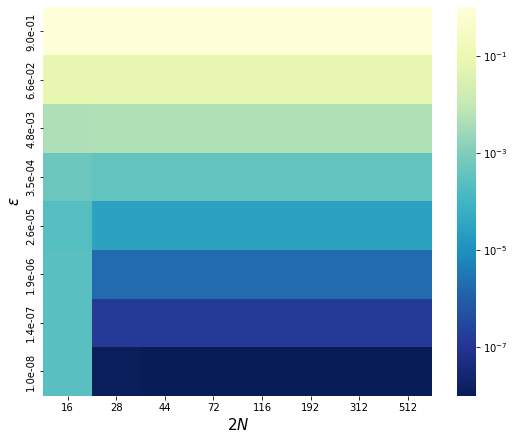

In [7]:
plot_err(
    {
        "bdy_type": hel.BoundaryType.NEUMANN,
        "ɛ_vec": ɛ_vec,
        "ɛ_str": ɛ_str,
        "α": α,
        "k": k,
        "M": 15,
        "N_vec": N_vec,
        "solver": hel.bie.get_total_field_qpax,
    }
)

### Relative error for PQR

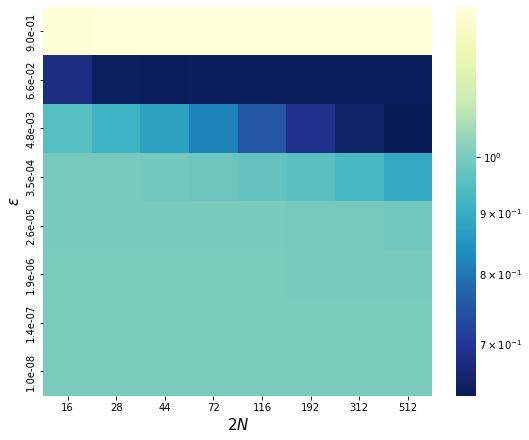

In [8]:
plot_err(
    {
        "bdy_type": hel.BoundaryType.NEUMANN,
        "ɛ_vec": ɛ_vec,
        "ɛ_str": ɛ_str,
        "α": α,
        "k": k,
        "M": 15,
        "N_vec": N_vec,
        "solver": hel.bie.get_total_field_pqr,
    }
)

## Dirichlet boundary condition

### Relative error for QPAX

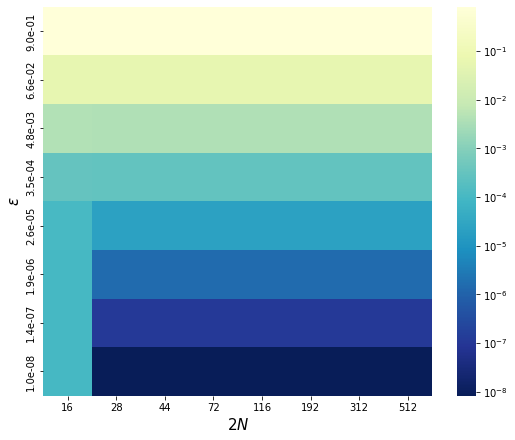

In [9]:
plot_err(
    {
        "bdy_type": hel.BoundaryType.DIRICHLET,
        "ɛ_vec": ɛ_vec,
        "ɛ_str": ɛ_str,
        "α": α,
        "k": k,
        "M": 15,
        "N_vec": N_vec,
        "solver": hel.bie.get_total_field_qpax,
    }
)

### Relative error for PQR

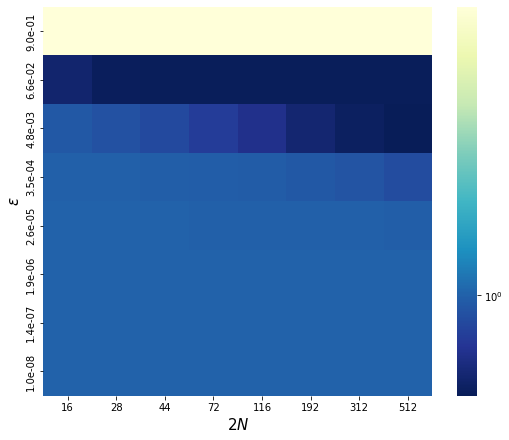

In [10]:
plot_err(
    {
        "bdy_type": hel.BoundaryType.DIRICHLET,
        "ɛ_vec": ɛ_vec,
        "ɛ_str": ɛ_str,
        "α": α,
        "k": k,
        "M": 15,
        "N_vec": N_vec,
        "solver": hel.bie.get_total_field_pqr,
    }
)